In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [5]:
df_cars = pd.read_csv('cars_train.csv', sep='\\t', encoding='utf-16', engine='python')

In [10]:
print("Número de linhas e colunas da tabela: {}".format(df_cars.shape))
df_cars.head()

Número de linhas e colunas da tabela: (29584, 29)


,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [251]:
print('\nResumo de quais as variáveis presentes e seus formatos\n')
df_cars.info()


Resumo de quais as variáveis presentes e seus formatos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       29584 non-null  object  
 1   num_fotos                29407 non-null  float64 
 2   marca                    29584 non-null  object  
 3   modelo                   29584 non-null  object  
 4   versao                   29584 non-null  object  
 5   ano_de_fabricacao        29584 non-null  int64   
 6   ano_modelo               29584 non-null  int64   
 7   hodometro                29584 non-null  float64 
 8   cambio                   29584 non-null  object  
 9   num_portas               29584 non-null  int64   
 10  tipo                     29584 non-null  object  
 11  blindado                 29584 non-null  object  
 12  cor                      29584 non-null  object  
 13  tipo

In [256]:
print('\nResumo de quantas variáveis são dados em branco ou ausentes')
(df_cars.isna().sum() / df_cars.shape[0]).map('{:.1%}'.format) 


Resumo de quantas variáveis são dados em branco ou ausentes


id                           0.0%
num_fotos                    0.6%
marca                        0.0%
modelo                       0.0%
versao                       0.0%
ano_de_fabricacao            0.0%
ano_modelo                   0.0%
hodometro                    0.0%
cambio                       0.0%
num_portas                   0.0%
tipo                         0.0%
blindado                     0.0%
cor                          0.0%
tipo_vendedor                0.0%
cidade_vendedor              0.0%
estado_vendedor              0.0%
anunciante                   0.0%
entrega_delivery             0.0%
troca                        0.0%
elegivel_revisao             0.0%
dono_aceita_troca           25.9%
veiculo_único_dono          64.8%
revisoes_concessionaria     69.0%
ipva_pago                   33.5%
veiculo_licenciado          46.2%
garantia_de_fábrica         85.2%
revisoes_dentro_agenda      80.0%
veiculo_alienado           100.0%
preco                        0.0%
quartis       

### Apresentado cada variável presente no banco de dados através de um gráfico, possibilitando melhor comprensão das variáveis e suas composições


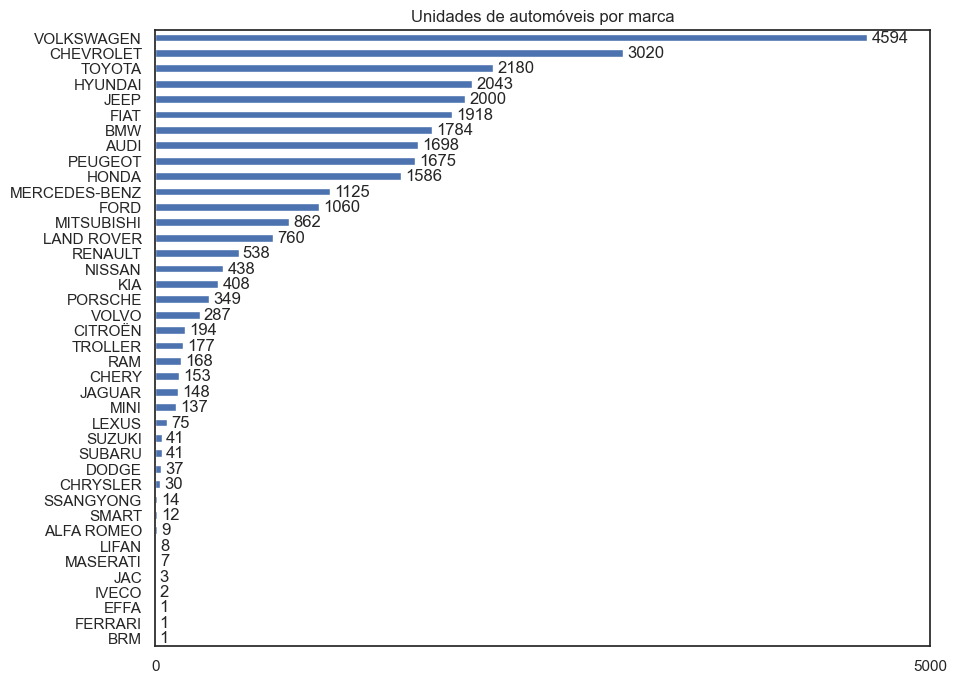

In [251]:
z  = df_cars['marca'].value_counts()[::-1]
fig , ax = plt.subplots(1, figsize=(10,8))

ind = np.arange(len(z))
rects = ax.barh(ind,z.array,align='center', height=0.5)
ax.bar_label(rects,padding=3)

z.plot.barh(ax=ax);
ax.set_xticks([0,5000]);
ax.set_title('Unidades de automóveis por marca');

    
    

#### Observando os dados pela varável marca, pode-se concluir que a Volkswagen e Chevrolet são as mais vendidas, sendo a primeira com destaque maior em relação a anterior. As 10 marcas mais vendidas aprensentam um volume superior a 1500 unidades.


A variável modelo possui 457 modelos de carros diferentes


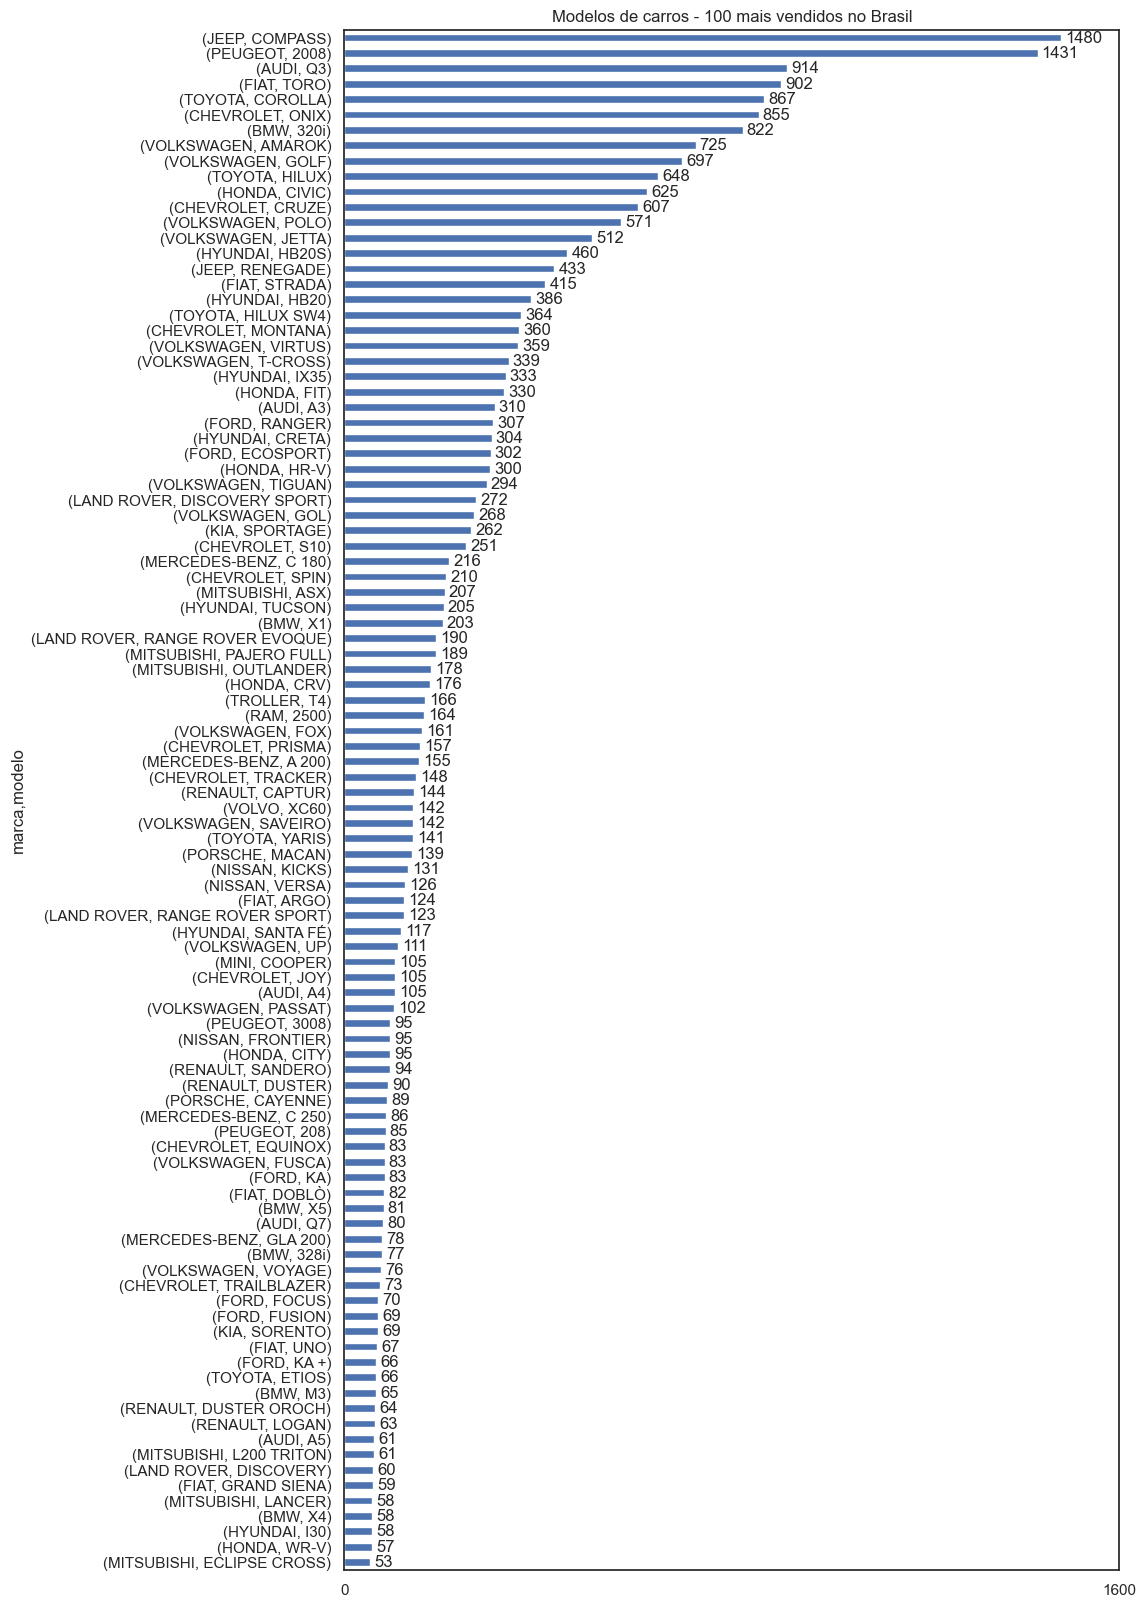

In [7]:
z = df_cars['modelo'].nunique()
print(f'\nA variável modelo possui {z} modelos de carros diferentes')

z = df_cars[['marca','modelo']].value_counts()[99::-1]
fig , ax = plt.subplots(1, figsize=(10,20))

ind = np.arange(len(z))
rects = ax.barh(ind,z.array,align='center', height=0.5)
ax.bar_label(rects,padding=3)

z.plot.barh(ax=ax)
ax.set_xticks([0,1600]);
ax.set_title('Modelos de carros - 100 mais vendidos no Brasil');



#### Interessante reparar que os 5 mais vendidos não apresentam como automóveis das 2 marcas mais vendidas, Volkswagem e Chevrolet, vindo a aparecer em 8º e 6º respectivamente. Mas a marca Volkswagen a mais presente entre os 10 e 15 modelos mais vendidos.

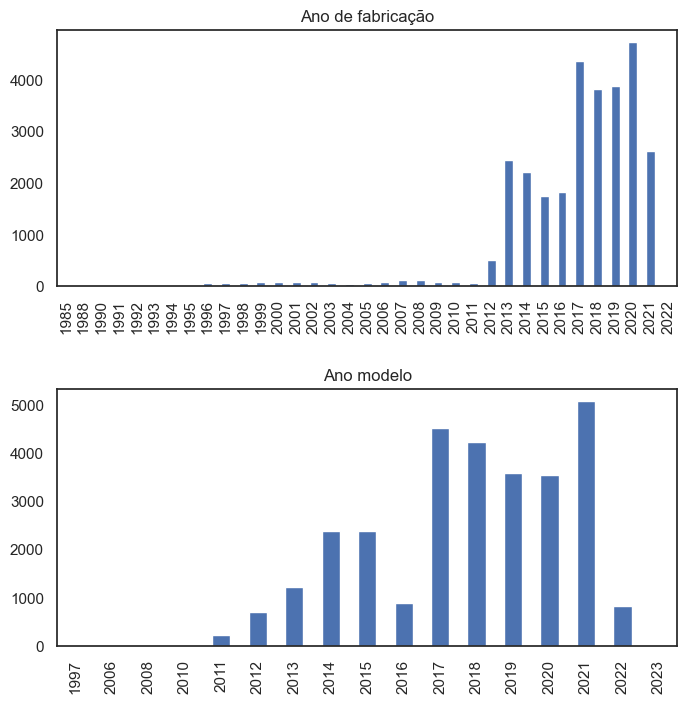

In [255]:

fig , ax = plt.subplots(2,figsize=(8,8))

fig.subplots_adjust(hspace=.4)

df_cars['ano_de_fabricacao'].value_counts().sort_index().plot.bar(ax=ax[0]);
df_cars['ano_modelo'].value_counts().sort_index().plot.bar(ax=ax[1]);

ax[0].set_title('Ano de fabricação')
ax[1].set_title('Ano modelo')

for i in range(2):
    ax[i].set_xlabel('')



#### É possível identificar que os anos de fabricacão entre 2013 e 2021 são os com unidades mais vendidas, com maior concentração para os anos entre 2017 e 2020. Para os anos de modelo do carro, possuem relevância os anos de 2014, 2015 e de 2017 a 2021.

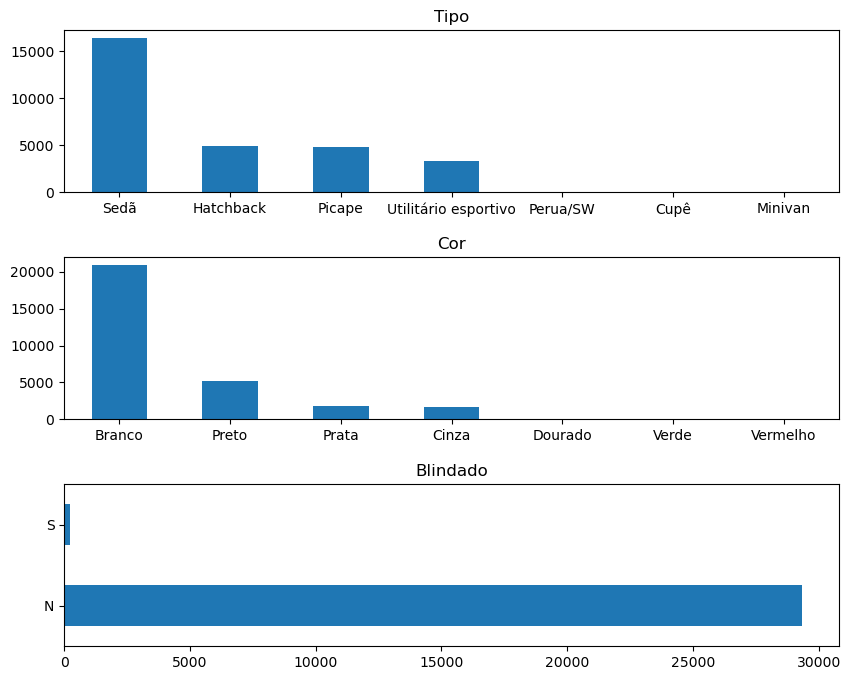

In [21]:
fig , ax = plt.subplots(3,figsize=(10,8))

fig.subplots_adjust(hspace=.4)

df_cars['tipo'].value_counts().plot.bar(ax=ax[0]);
df_cars['cor'].value_counts().plot.bar(ax=ax[1]);
df_cars['blindado'].value_counts().plot.barh(ax=ax[2]);

ax[0].set_title('Tipo')
ax[1].set_title('Cor')
ax[2].set_title('Blindado')

for i in range(3):
    ax[i].xaxis.set_tick_params(rotation=0)

    

#### O mercado apresenta uma maior predisposição para modelos do tipo sedã, cor branca e majoritariamente automóveis sem blindagem.

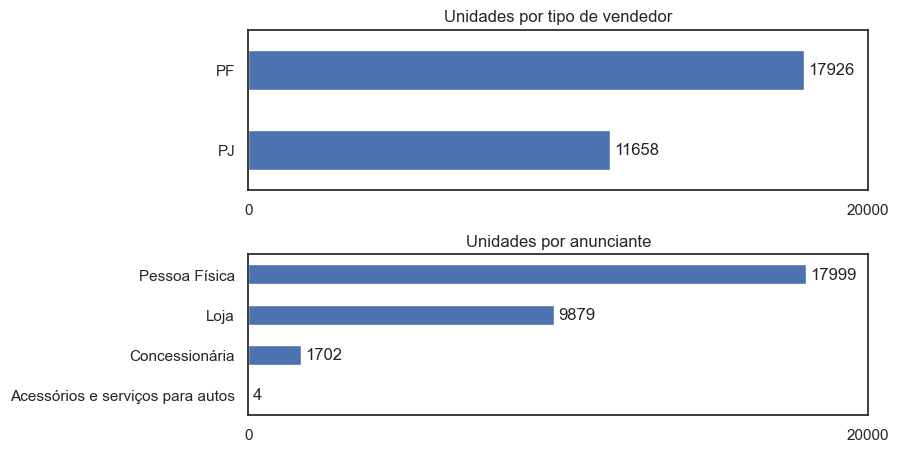

In [271]:
z = df_cars['tipo_vendedor'].value_counts()[::-1]
z2 = df_cars['anunciante'].value_counts()[::-1]

fig , axs = plt.subplots(2,figsize=(8,5))

fig.subplots_adjust(hspace=.4)


rects1 = axs[0].barh(np.arange(2),z.array,align='center', height=0.5)
rects2 = axs[1].barh(np.arange(4),z2.array,align='center', height=0.5)
axs[0].bar_label(rects1,padding=3)
axs[1].bar_label(rects2,padding=3)

z.plot.barh(ax=axs[0]);
z2.plot.barh(ax=axs[1]);
axs[0].set_xticks([0,20000]);
axs[1].set_xticks([0,20000]);
axs[0].set_title('Unidades por tipo de vendedor');
axs[1].set_title('Unidades por anunciante');


#### Para as variáveis tipo_vendedor e anunciante, a predominância no mercado está para o pessoa física seguido pelo pessoa jurídica, tendo volume inferior a 14000 (metade da base de dados), com clara vantagem no segmento para as lojas.

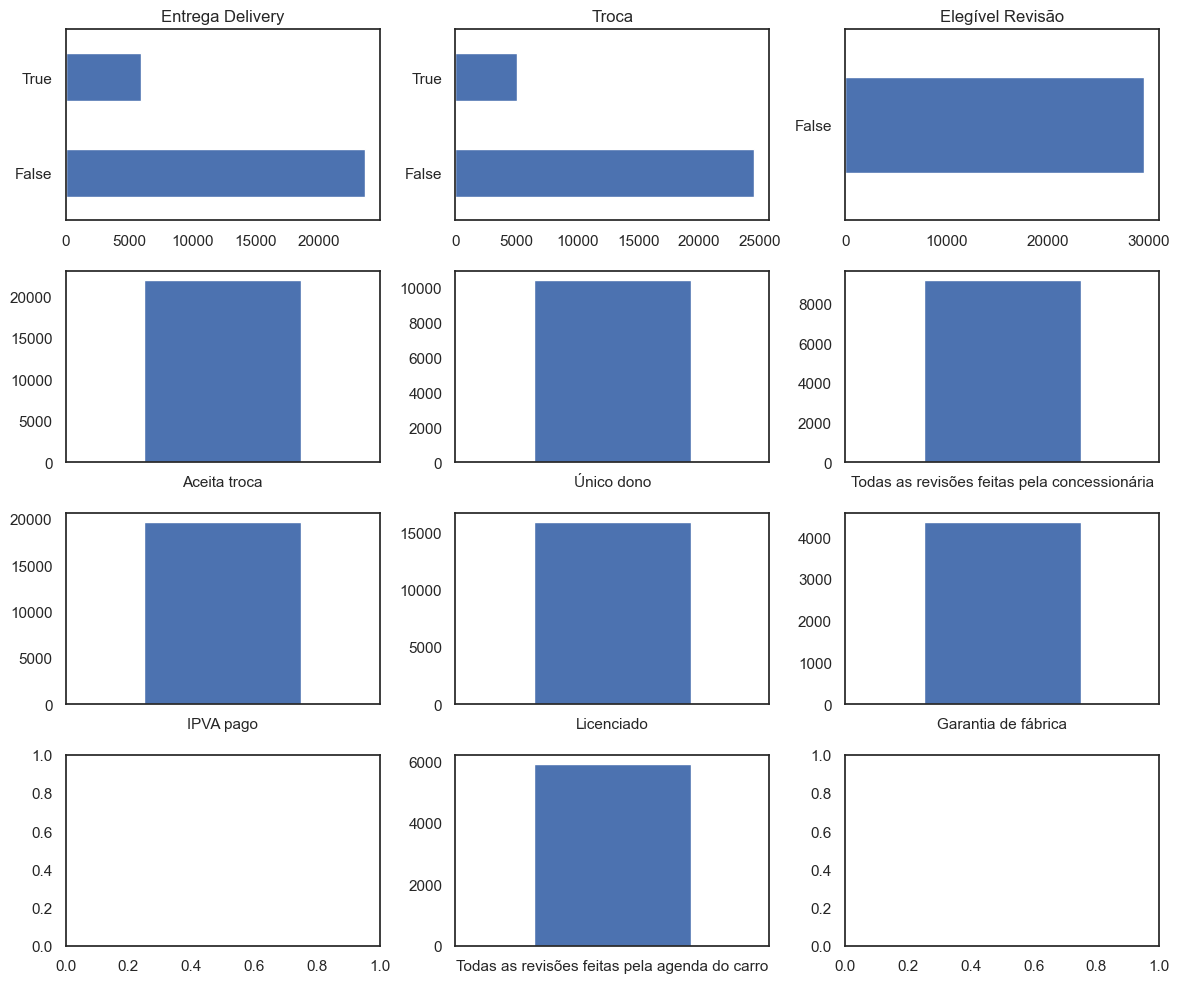

In [236]:
fig , axs = plt.subplots(4,3, figsize=(12,10), layout='tight')

df_cars['entrega_delivery'].value_counts().plot.barh(ax=axs[0,0]);
df_cars['troca'].value_counts().plot.barh(ax=axs[0,1]);
df_cars['elegivel_revisao'].value_counts().plot.barh(ax=axs[0,2]);
df_cars['dono_aceita_troca'].value_counts().plot.bar(ax=axs[1,0]);
df_cars['veiculo_único_dono'].value_counts().plot.bar(ax=axs[1,1]);
df_cars['revisoes_concessionaria'].value_counts().plot.bar(ax=axs[1,2]);
df_cars['ipva_pago'].value_counts().plot.bar(ax=axs[2,0]);
df_cars['veiculo_licenciado'].value_counts().plot.bar(ax=axs[2,1]);
df_cars['garantia_de_fábrica'].value_counts().plot.bar(ax=axs[2,2]);
df_cars['revisoes_dentro_agenda'].value_counts().plot.bar(ax=axs[3,1]);

axs[0,0].set_title('Entrega Delivery')
axs[0,1].set_title('Troca')
axs[0,2].set_title('Elegível Revisão')

padding=-32, color='white'

axs[1,0].xaxis.set_tick_params(rotation=0)
axs[1,1].xaxis.set_tick_params(rotation=0)
axs[1,2].xaxis.set_tick_params(rotation=0)
axs[2,0].xaxis.set_tick_params(rotation=0)
axs[2,1].xaxis.set_tick_params(rotation=0)
axs[2,2].xaxis.set_tick_params(rotation=0)
axs[3,1].xaxis.set_tick_params(rotation=0)



## Os gráficos a seguir tem como objetivo identificar a dinâmica do mercado através das relações entre as variáveis

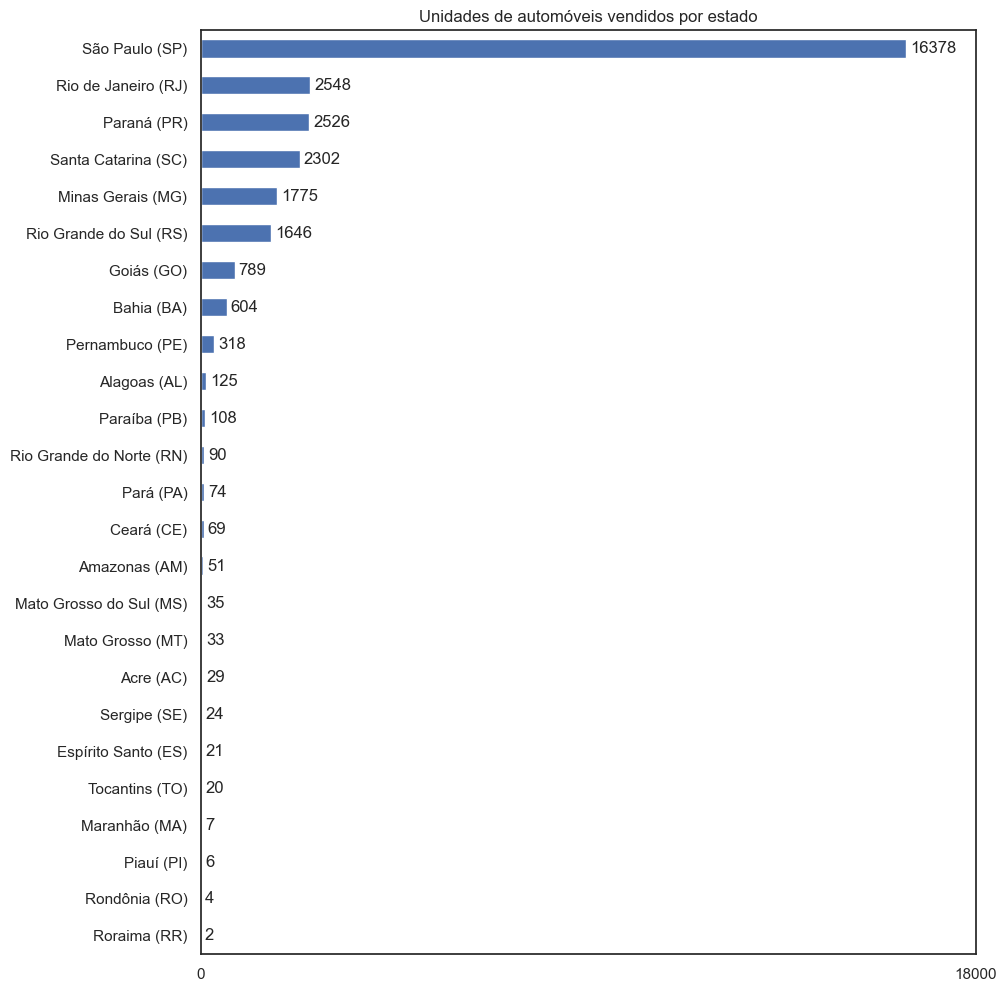

In [257]:
z = df_cars['estado_vendedor'].value_counts()[::-1]
fig , ax = plt.subplots(1, figsize=(10,12))

ind = np.arange(len(z))
rects = ax.barh(ind,z.array,align='center', height=0.5)
ax.bar_label(rects,padding=3)

z.plot.barh(ax=ax)
ax.set_xticks([0,18000]);
ax.set_title('Unidades de automóveis vendidos por estado');


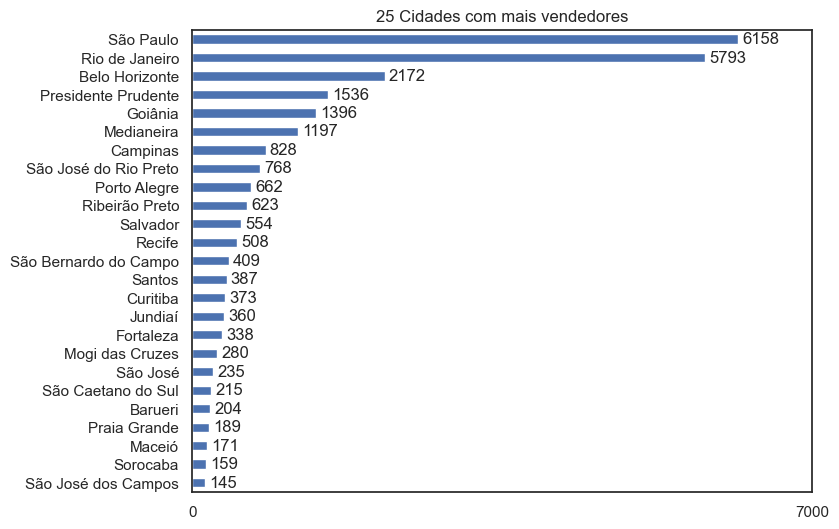

In [263]:
#df_cars['cidade_vendedor'].value_counts()[:50].plot.bar(figsize=(12,4));
z = df_cars['cidade_vendedor'].value_counts()[24::-1]
fig , ax = plt.subplots(1, figsize=(8,6))

ind = np.arange(len(z))
rects = ax.barh(ind,z.array,align='center', height=0.5)
ax.bar_label(rects,padding=3)

z.plot.barh(ax=ax)
ax.set_xticks([0,7000]);
ax.set_title('25 Cidades com mais vendedores');


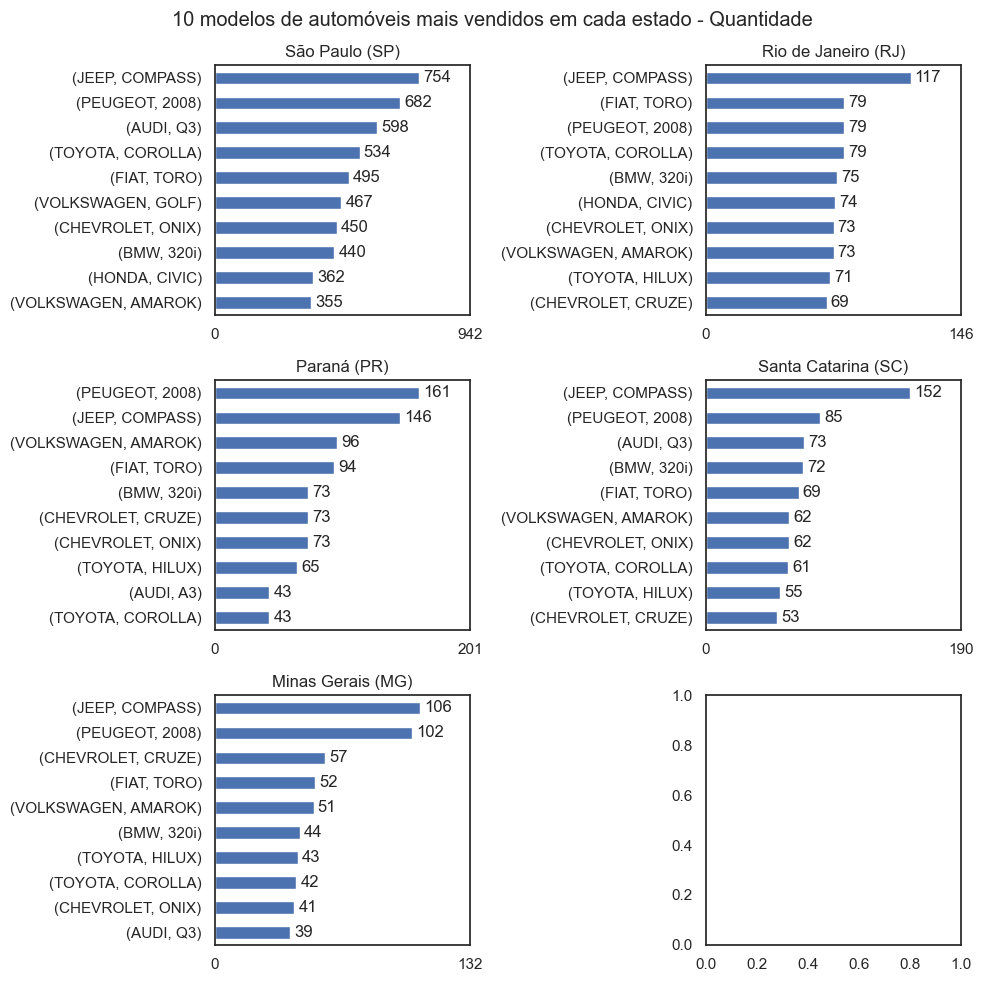

In [260]:
top_estados = df_cars['estado_vendedor'].value_counts()[:5].index.to_list()
fig , axs = plt.subplots(3,2, figsize= (10,10), layout='tight')

k = 0
for i in range(3):
    for j in range(2):
        if i==2 and j==1:
            break
        infos = ['marca','modelo']
        z = df_cars.loc[df_cars['estado_vendedor'] == top_estados[k], infos].value_counts()[9::-1]

        ind = np.arange(len(z))
        rects = axs[i,j].barh(ind,z.array,align='center', height=0.5)
        axs[i,j].bar_label(rects,padding=3) # align='center', height=0.5)
        z.plot.barh(ax=axs[i,j]);
        axs[i,j].set_ylabel('');
        tk_max = int(z.max() * 1.25)
        axs[i,j].set_xticks([0,tk_max]);
        axs[i,j].set_title(top_estados[k])
        k += 1
        
plt.suptitle('10 modelos de automóveis mais vendidos em cada estado - Quantidade');

        

### Breve resumo estatístico sobre os preços dos automóveis

Os quartis 1, 2 e 3 são respectivamente 25%, 50% e 75%. Onde esses preços determinam que, por exemplo, 25% dos valores presentes, estão entre o menor preço (9869) e 76571, valor correspondente ao quartil 1.

In [154]:
z = df_cars['preco'].describe().astype('int64')
z.index = ['Quantidade','Preço Médio','Desvio Padrão','Menor Preço','Quartil 1','Quartil 2','Quartil 3','Maior Preço'] 
z

Quantidade         29584
Preço Médio       133023
Desvio Padrão      81662
Menor Preço         9869
Quartil 1          76571
Quartil 2         114355
Quartil 3         163679
Maior Preço      1359812
Name: preco, dtype: int64

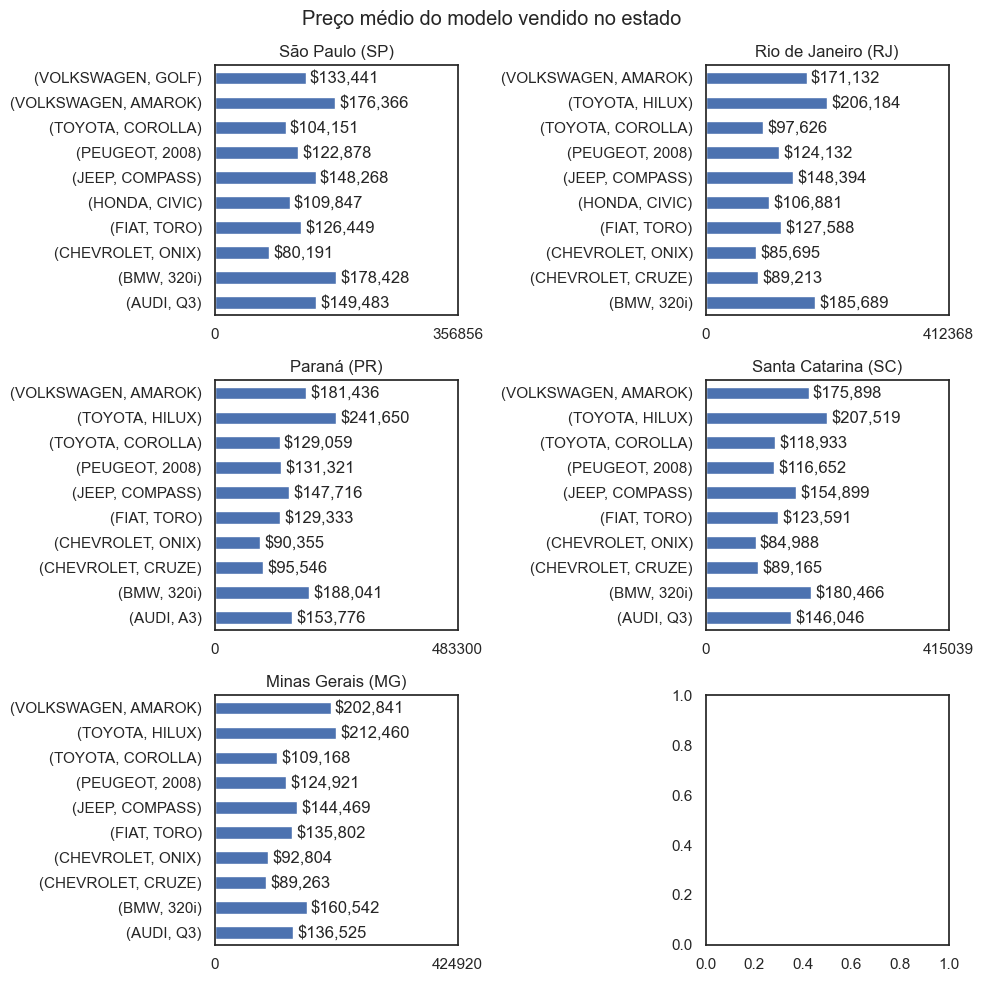

In [261]:
fig , axs = plt.subplots(3,2, figsize= (10,10), layout='tight')

k = 0
df = pd.DataFrame()
for i in range(3):
    for j in range(2):
        if i==2 and j==1:
            break
        infos = ['marca','modelo']
        filtro = df_cars['estado_vendedor'] == top_estados[k]
        modelos_estado = df_cars.loc[filtro, 'modelo'].value_counts()[:10].index.to_list()
        for modelo in modelos_estado:
            filtro = (df_cars['estado_vendedor'] == top_estados[k]) & (df_cars['modelo'] == modelo)
            z = df_cars.loc[filtro]
            
            df = pd.concat([df,z])
            
        df = df.groupby(infos)['preco'].mean()      
        
        ind = np.arange(len(df))
        rects = axs[i,j].barh(ind, df.array, align='center', height=0.5)
        axs[i,j].bar_label(rects,padding=3, labels=df.map('${:,.0f}'.format))
        df.plot.barh(ax=axs[i,j]);
        axs[i,j].set_ylabel('');
        tk_max = df.max() * 2
        axs[i,j].set_xticks([0,tk_max]);
        axs[i,j].set_title(top_estados[k])
        k += 1
        df = pd.DataFrame()
plt.suptitle('Preço médio do modelo vendido no estado');

In [195]:
print('\nEstatísticas dos principais mercados')

df = pd.DataFrame()
for estado in top_estados:
    z = df_cars[df_cars['estado_vendedor'] == estado]
    df = pd.concat([z,df])

z = df.groupby(['estado_vendedor'])['preco'].agg([('Total','sum'),
                                                  ('Preço Médio','mean'),
                                                  ('Mediana','median'),
                                                  ('Unidades','count')]).astype('int64')

#(z['Total']/df_cars['preco'].sum()).plot.pie(title='Participação de mercado em relação ao Brasil',autopct='%.1f%%');

z.loc[:,'Total']=z.loc[:,'Total'].map('${:,.0f}'.format)
z.loc[:,'Preço Médio']=z.loc[:,'Preço Médio'].map('${:,.0f}'.format)
z.loc[:,'Mediana']=z.loc[:,'Mediana'].map('${:,.0f}'.format)

z



Estatísticas dos principais mercados


,Total,Preço Médio,Mediana,Unidades
estado_vendedor,,,,
Minas Gerais (MG),"$239,415,444","$134,881","$118,158",1775
Paraná (PR),"$367,439,545","$145,463","$128,271",2526
Rio de Janeiro (RJ),"$343,877,627","$134,959","$116,361",2548
Santa Catarina (SC),"$309,486,913","$134,442","$115,386",2302
São Paulo (SP),"$2,125,155,114","$129,756","$109,614",16378


In [171]:
print('\nEstatísticas detalhadas dos principais mercados')

df['quartis'] = pd.qcut(df['preco'], 4, precision=0)
z = df.groupby(['estado_vendedor','quartis'])['preco'].agg([('Total','sum'),
                                                            ('Preço Médio','mean'),
                                                            ('Mediana','median'),
                                                           ('Unidades','count')]).astype('int64')

z.loc[:,'Total']=z.loc[:,'Total'].map('${:,.0f}'.format)
z.loc[:,'Preço Médio']=z.loc[:,'Preço Médio'].map('${:,.0f}'.format)
z.loc[:,'Mediana']=z.loc[:,'Mediana'].map('${:,.0f}'.format)

z




Estatísticas detalhadas dos principais mercados


Total Preço Médio   Mediana  \
estado_vendedor     quartis                                                     
Minas Gerais (MG)   (9869.0, 76112.0]       $22,155,291     $57,397   $59,757   
                    (76112.0, 113346.0]     $41,727,450     $93,980   $93,615   
                    (113346.0, 163214.0]    $64,377,734    $136,105  $135,283   
                    (163214.0, 1359813.0]  $111,154,968    $235,497  $213,642   
Paraná (PR)         (9869.0, 76112.0]       $26,790,291     $57,000   $59,135   
                    (76112.0, 113346.0]     $53,227,793     $94,543   $94,493   
                    (113346.0, 163214.0]    $94,561,055    $137,243  $137,024   
                    (163214.0, 1359813.0]  $192,860,405    $239,876  $221,392   
Rio de Janeiro (RJ) (9869.0, 76112.0]       $34,022,004     $55,957   $57,943   
                    (76112.0, 113346.0]     $58,007,198     $93,559   $92,517   
                    (113346.0, 163214.0]    $87,018,782    $136,607  $135,449   
                    (163214.0, 1359813.0]  $164,829,641    $241,331  $221,029   
Santa Catarina (SC) (9869.0, 76112.0]       $31,483,219     $56,828   $58,215   
                    (76112.0, 113346.0]     $54,069,832     $94,034   $93,268   
                    (113346.0, 163214.0]    $81,122,166    $137,262  $137,470   
                    (163214.0, 1359813.0]  $142,811,695    $245,380  $221,888   
São Paulo (SP)      (9869.0, 76112.0]      $245,460,606     $56,233   $57,705   
                    (76112.0, 113346.0]    $391,760,044     $93,722   $93,090   
                    (113346.0, 163214.0]   $545,881,442    $136,743  $136,488   
                    (163214.0, 1359813.0]  $942,053,021    $245,262  $220,751   

                                           Unidades  
estado_vendedor     quartis                          
Minas Gerais (MG)   (9869.0, 76112.0]           386  
                    (76112.0, 113346.0]         444  
                    (113346.0, 163214.0]        473  
                    (163214.0, 1359813.0]       472  
Paraná (PR)         (9869.0, 76112.0]           470  
                    (76112.0, 113346.0]         563  
                    (113346.0, 163214.0]        689  
                    (163214.0, 1359813.0]       804  
Rio de Janeiro (RJ) (9869.0, 76112.0]           608  
                    (76112.0, 113346.0]         620  
                    (113346.0, 163214.0]        637  
                    (163214.0, 1359813.0]       683  
Santa Catarina (SC) (9869.0, 76112.0]           554  
                    (76112.0, 113346.0]         575  
                    (113346.0, 163214.0]        591  
                    (163214.0, 1359813.0]       582  
São Paulo (SP)      (9869.0, 76112.0]          4365  
                    (76112.0, 113346.0]        4180  
                    (113346.0, 163214.0]       3992  
                    (163214.0, 1359813.0]      3841

### Levando em considerção que o carro popular é todos aqueles modelos sendo vendidos até o valor de 76571 (quartil 1)

In [8]:
df_cars.loc[df_cars['preco'] <= 76571,'estado_vendedor'].value_counts()

São Paulo (SP)              4414
Rio de Janeiro (RJ)          626
Santa Catarina (SC)          565
Paraná (PR)                  481
Minas Gerais (MG)            392
Rio Grande do Sul (RS)       344
Bahia (BA)                   167
Goiás (GO)                   102
Pernambuco (PE)              101
Paraíba (PB)                  40
Ceará (CE)                    28
Amazonas (AM)                 27
Rio Grande do Norte (RN)      24
Alagoas (AL)                  24
Pará (PA)                     16
Acre (AC)                     16
Mato Grosso do Sul (MS)        9
Espírito Santo (ES)            7
Tocantins (TO)                 4
Mato Grosso (MT)               4
Sergipe (SE)                   3
Roraima (RR)                   2
Name: estado_vendedor, dtype: int64

#### O melhor estado para se vender um automóvel de modelo popular é o estado de São Paulo

### O melhor estado para se comprar uma picape, considerando o menor preço e ano de frabricção mais recente

In [25]:
z = df_cars.loc[df_cars['tipo'] <= 'Picape',:]
(
    z.groupby('estado_vendedor')[['ano_de_fabricacao','preco']].mean()
    .astype('int64')
    .sort_values(by='ano_de_fabricacao', ascending=False)
)



,ano_de_fabricacao,preco
estado_vendedor,,
Piauí (PI),2020,190915
Espírito Santo (ES),2020,94868
Pará (PA),2020,96320
Maranhão (MA),2020,131409
Paraíba (PB),2019,78682
Alagoas (AL),2019,120636
Sergipe (SE),2019,285828
Rondônia (RO),2019,126905
Tocantins (TO),2019,120423


#### Temos como as melhores opções, os estados do Espírito Santos, Pará e Paraíba

### Os melhores estados para se comprar um automóvel com garantia de fábrica, assumindo uma média de 3 anos de garantia á partir do ano de fabricação, sendo desde 2021, restando quase 1 ano de garantia:

In [47]:
filtro = (df_cars['garantia_de_fábrica'] <= 'Garantia de fábrica') & (df_cars['ano_de_fabricacao'] >= 2021)
(
    df_cars.loc[filtro,:]
    .groupby(['ano_de_fabricacao','estado_vendedor'])[['preco']].mean()
    .astype('int64')
    .sort_values(by=['ano_de_fabricacao','preco'], ascending=[False,True])
)

preco
ano_de_fabricacao estado_vendedor                 
2022              Goiás (GO)                123730
                  Rio Grande do Sul (RS)    134657
                  São Paulo (SP)            169819
                  Minas Gerais (MG)         183483
                  Rio de Janeiro (RJ)       210840
                  Paraná (PR)               223030
                  Santa Catarina (SC)       228395
2021              Paraíba (PB)               95762
                  Pará (PA)                  96197
                  Espírito Santo (ES)        99600
                  Amazonas (AM)             108153
                  Ceará (CE)                123939
                  Mato Grosso do Sul (MS)   125225
                  Alagoas (AL)              129886
                  Rio Grande do Norte (RN)  135468
                  Bahia (BA)                137192
                  Pernambuco (PE)           165045
                  São Paulo (SP)            166843
                  Minas Gerais (MG)         168351
                  Rio Grande do Sul (RS)    170691
                  Goiás (GO)                175790
                  Paraná (PR)               176380
                  Rio de Janeiro (RJ)       177703
                  Santa Catarina (SC)       183960
                  Mato Grosso (MT)          216380
                  Sergipe (SE)              367138